In [55]:
import numpy as np
import pylab as plt

#Задача 1.  

Положительно определённая вещественная матрица всегда имеет ровно один отрицательно  определённый вещественный корень.

Напишите функцию, которая вычисляет отрицательно  определённый вещественный квадратный корень из такой матрицы с помощью сингулярного разложения. 







In [89]:
def root(A):
    U, S, V = np.linalg.svd(A)
    S_new = -1*np.sqrt(S)
    return U@np.diag(S_new)@V

#Задача 2.  Спектры.

Постройте псевдоспектр матрицы 20-го порядка

$$A=\left[\begin{array}{rrrrrrr}
20 & 20 & 0 & 0 & \ldots & 0 & 0 \\
0 & 19 & 20 & 0 & \ldots & 0 & 0 \\
0 & 0 & 18 & 20 & \ldots & 0 & 0 \\
\ldots & \ldots & \ldots & \ldots & \ldots & . \\
0 & 0 & 0 & 0 & \ldots & 2 & 20 \\
\boldsymbol{\varepsilon} & 0 & 0 & 0 & \ldots & 0 & 1
\end{array}\right]$$

In [1]:
from pseudopy import NonnormalAuto, demo
from matplotlib import pyplot
from scipy.linalg import eigvals

In [15]:
vec = np.arange(20, 0, -1)
A = np.diag(vec)
i, j = np.indices(A.shape)
A[i+1 == j] = 20
n = 20

AttributeError: 'NoneType' object has no attribute 'get_view_interval'

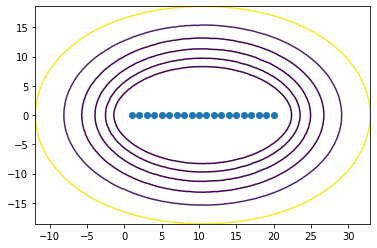

In [30]:
pseudo = NonnormalAuto(A, eps_min=1e-5, eps_max=1, n_circles=100, n_points=100)

# plot
pseudo.plot([10**k for k in range(-5, 1)], spectrum=eigvals(A))

#Задача 3. Итерации.


Алгоритм обратной параболической интерполяции задаётся рекуррентной формулой:
$$
\begin{gathered}
x_{n+1}=\frac{f_{n-1} f_n}{\left(f_{n-2}-f_{n-1}\right)\left(f_{n-2}-f_n\right)} x_{n-2}+\frac{f_{n-2} f_n}{\left(f_{n-1}-f_{n-2}\right)\left(f_{n-1}-f_n\right)} x_{n-1} \\
+\frac{f_{n-2} f_{n-1}}{\left(f_n-f_{n-2}\right)\left(f_n-f_{n-1}\right)} x_n
\end{gathered}
$$

Реализуйте метод простой итерации для нахождения решения следующего уравнения относительно $x$ :

 $0.5-\cos x=0$


Используйте следующие три начальных приближения: -1, 0, 1.

Какова сходимость итераций? Нарисуйте график невязки в логарифмическом масштабе, чтобы это определить.

In [59]:
fun = lambda x : 0.5 - np.cos(x)

def par_inter(fun, x_n2, x_n1, x_n):
    f_n2 = fun(x_n2)
    f_n1 = fun(x_n1)
    f_n = fun(x_n)
    
    first = f_n1*f_n/(f_n2 - f_n1)/(f_n2 - f_n)
    second = f_n2*f_n/(f_n1 - f_n2)/(f_n1 - f_n)
    third = f_n1*f_n2/(f_n - f_n2)/(f_n - f_n1)
    
    x = first*x_n2 + second*x_n1 + third*x_n
    
    return x, x_n, x_n1

Root is  -1.0471975511404206
With num steps:  4


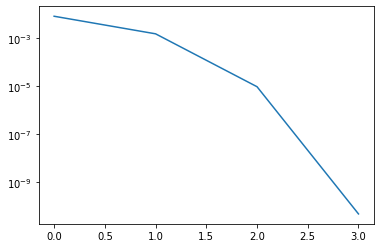

In [72]:
fun = lambda x : 0.5 - np.cos(x)

x_n2 = -1
x_n1 = -1 + np.random.rand()
x_n = -1 + np.random.rand()

nevs = []
eps = 1e-7
step = 0

while np.abs(fun(x_n)) > eps:
    step += 1
    x_n, x_n1, x_n2 = par_inter(fun, x_n2, x_n1, x_n)
    nevs.append(-1*fun(x_n))

print("Root is ", x_n)
print("With num steps: ", step)

plt.plot(nevs)
plt.yscale('log')
plt.show()

Root is  8.889746701507707e+158
With num steps:  601


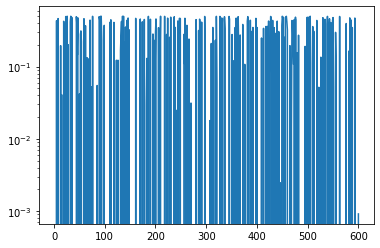

In [73]:
fun = lambda x : 0.5 - np.cos(x)

x_n2 = 0
x_n1 = 0 + np.random.rand()
x_n = 0 + np.random.rand()

nevs = []
eps = 1e-3
step = 0

while np.abs(fun(x_n)) > eps:
    step += 1
    x_n, x_n1, x_n2 = par_inter(fun, x_n2, x_n1, x_n)
    nevs.append(-1*fun(x_n))

print("Root is ", x_n)
print("With num steps: ", step)

plt.plot(nevs)
plt.yscale('log')
plt.show()

Root is  1.0471975754662655
With num steps:  3


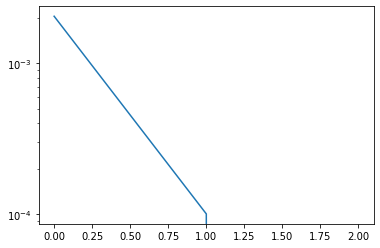

In [75]:
fun = lambda x : 0.5 - np.cos(x)

x_n2 = 1
x_n1 = 1 + np.random.rand()
x_n = 1 + np.random.rand()

nevs = []
eps = 1e-7
step = 0

while np.abs(fun(x_n)) > eps:
    step += 1
    x_n, x_n1, x_n2 = par_inter(fun, x_n2, x_n1, x_n)
    nevs.append(-1*fun(x_n))

print("Root is ", x_n)
print("With num steps: ", step)

plt.plot(nevs)
plt.yscale('log')
plt.show()

# Задача 4. Одномерный кристалл.

**Одномерный кристалл.** 

Рассмотрите одномерный кристалл с двумя атомами различной массы  $m$  и $M$ , состоящий из $2 N-1$ атомов, зажатый между неподвижными стенками.
- Считая, что соседние атомы  соединены одинаковыми пружинами с упругой константой $k=1$, выпишите уравнения движения (уравнения Ньютона) на положения атомов $x_{i} .$ Два крайних атома к стенке прикреплены тоже пружиной. 
- Предполагая, что все атомы движутся с одной и той же частотой, $x_{i}(t)=u_{i} e^{-i \omega t}$, перепишите найденные выше уравнения в виде системы линейных уравнений на вектор u. Составьте матрицу A, спектр которой определяет частоты нормальных мод.
- Используя np. linalg.eig, найдите спектр матрицы $A$ (возьмите $N=100$ и $M / m=2$ ). Постройте гистограмму собственных значений. 


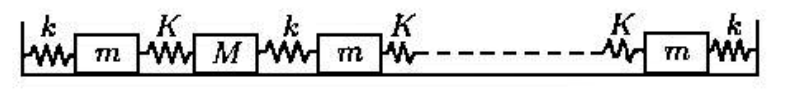

\begin{aligned}
&m_{i}= \begin{cases}M,  \text { i чётное } \\ \text { m, i  нечётное }\end{cases}\\
&m_{i} \ddot{x_i}=k\left(x_{i+1}-x_{i}\right)-k\left(x_{i}-x_{i-1}\right)
\end{aligned}

\begin{aligned}
&m_{i}= \begin{cases}M,  \text { i чётное } \\ \text { m, i  нечётное }\end{cases}\\
&m_{i} u_i*w^2=k\left(u_{i+1}-2u_{i} + u_{i-1}\right)
\end{aligned}

In [81]:
k = 1
M = 4
m = 2
N = 100

A = np.zeros((N, N))
i = np.indices(A.shape)

for i in range(1, N-1):
    if i%2 == 0:
        A[i, i-1] = k/m
        A[i, i+1] = k/m
        A[i, i] = -2*k/m
        
    if i%2 != 0:
        A[i, i-1] = k/M
        A[i, i+1] = k/M
        A[i, i] = -2*k/M
        
A[0, 0] = -2*k/m
A[0, 1] = k/m
A[N-1, N-1] = -2*k/m
A[N-1, N-2] = -2*k/m    

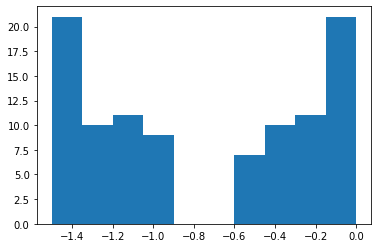

In [88]:
eig = np.linalg.eigvals(A)
plt.hist(np.real(eig))
plt.show()